### xG Rolling Plots - Leeds United

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

#### Data

In [2]:
epl_2021 = pd.read_csv("../data/raw/Fbref-EPL-2021.csv")
epl_2021.head(1)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2020-09-12,12:30 (13:30),Fulham,0.2,0–3,1.8,Arsenal,NaN,Craven Cottage,Chris Kavanagh,Match Report,NaN


In [3]:
epl_2021.columns

Index(['Wk', 'Day', 'Date', 'Time', 'Home', 'xG', 'Score', 'xG.1', 'Away',
       'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes'],
      dtype='object')

In [4]:
epl_2021 = epl_2021[['Date', 'Home', 'xG', 'xG.1', 'Away']]
epl_2021.head(1)

,Date,Home,xG,xG.1,Away
0,2020-09-12,Fulham,0.2,1.8,Arsenal


In [5]:
epl_2021.dtypes

Date     object
Home     object
xG      float64
xG.1    float64
Away     object
dtype: object

In [6]:
# column rename
epl_2021.rename(columns={"Home": "HomeTeam", "xG": "xG HomeTeam", "xG.1": "xG AwayTeam", "Away": "AwayTeam"}, inplace=True)
epl_2021.head(1)

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
0,2020-09-12,Fulham,0.2,1.8,Arsenal


In [7]:
# column date as timestamp
epl_2021['Date'] = pd.to_datetime(epl_2021['Date'])

In [8]:
leeds_2021 = epl_2021.loc[(epl_2021.HomeTeam == 'Leeds United') | (epl_2021.AwayTeam == 'Leeds United')]
leeds_2021.head()

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
2,2020-09-12,Liverpool,3.3,0.6,Leeds United
10,2020-09-19,Leeds United,1.7,1.8,Fulham
24,2020-09-27,Sheffield Utd,1.6,1.6,Leeds United
33,2020-10-03,Leeds United,1.7,1.5,Manchester City
51,2020-10-19,Leeds United,1.6,0.5,Wolves


In [9]:
leeds_2021.to_csv("../data/Fbref-Leeds-2021.csv")

now the same for season 2021-22

In [10]:
epl_2122 = pd.read_csv("../data/raw/Fbref-EPL-2122.csv")
epl_2122.head(1)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2021-08-13,20:00 (21:00),Brentford,1.3,2–0,1.4,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver,Match Report,NaN


In [11]:
epl_2122 = epl_2122[['Date', 'Home', 'xG', 'xG.1', 'Away']]
epl_2122.head(1)

,Date,Home,xG,xG.1,Away
0,2021-08-13,Brentford,1.3,1.4,Arsenal


In [12]:
# column rename
epl_2122.rename(columns={"Home": "HomeTeam", "xG": "xG HomeTeam", "xG.1": "xG AwayTeam", "Away": "AwayTeam"}, inplace=True)
epl_2122.head(1)

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
0,2021-08-13,Brentford,1.3,1.4,Arsenal


In [13]:
# column date as timestamp
epl_2122['Date'] = pd.to_datetime(epl_2122['Date'])

In [14]:
leeds_2122 = epl_2122.loc[(epl_2122.HomeTeam == 'Leeds United') | (epl_2122.AwayTeam == 'Leeds United')]
leeds_2122.head()

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
1,2021-08-14,Manchester Utd,1.5,0.6,Leeds United
12,2021-08-21,Leeds United,1.5,2.0,Everton
29,2021-08-29,Burnley,1.4,1.5,Leeds United
41,2021-09-12,Leeds United,1.2,4.0,Liverpool
44,2021-09-17,Newcastle Utd,1.3,2.0,Leeds United


In [15]:
leeds_2122.to_csv("../data/Fbref-Leeds-2122.csv")

#### Data Manipulation

append the two dataframe

In [16]:
leeds = leeds_2021.append(leeds_2122)
len(leeds)

C:\Users\FC\AppData\Local\Temp\ipykernel_20020\1518005496.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leeds = leeds_2021.append(leeds_2122)


76

In [17]:
leeds.to_csv("../data/LEEDS-xG.csv")

we need to create a series for both expected goals created and conceded regardless if the team played at home or away

create a new DataFrame with six columns: team, opponent, variable, value, venue and date

we'll split our df into two and then concatenate them back together

by adding the venue column we could even deepen our analysis to only consider home or away performance

In [18]:
leeds.columns

Index(['Date', 'HomeTeam', 'xG HomeTeam', 'xG AwayTeam', 'AwayTeam'], dtype='object')

In [19]:
home_df = leeds.copy()

In [20]:
home_df = home_df.melt(id_vars=['Date', 'HomeTeam', 'AwayTeam'])
home_df['Venue'] = "H"

In [21]:
home_df.rename(columns= {'HomeTeam': 'Team', 'AwayTeam': 'Opponent'}, inplace=True)
home_df.replace({"variable":{'xG HomeTeam': 'xG_for', 'xG AwayTeam': 'xG_ag'}}, inplace=True)

same for away data

In [22]:
away_df = leeds.copy()

In [23]:
away_df = away_df.melt(id_vars=['Date', 'AwayTeam', 'HomeTeam'])
away_df['Venue'] = "A"

In [24]:
away_df.rename(columns= {'AwayTeam': 'Team', 'HomeTeam': 'Opponent'}, inplace=True)
away_df.replace({"variable":{'xG AwayTeam': 'xG_for', 'xG HomeTeam': 'xG_ag'}}, inplace=True)

join it back together

In [25]:
df = pd.concat([home_df, away_df]).reset_index(drop = True)

In [26]:
df.head()

,Date,Team,Opponent,variable,value,Venue
0,2020-09-12,Liverpool,Leeds United,xG_for,3.3,H
1,2020-09-19,Leeds United,Fulham,xG_for,1.7,H
2,2020-09-27,Sheffield Utd,Leeds United,xG_for,1.6,H
3,2020-10-03,Leeds United,Manchester City,xG_for,1.7,H
4,2020-10-19,Leeds United,Wolves,xG_for,1.6,H


filter the records related to AC Milan and compute the rolling average for the expected goals data

In [27]:
# filter Leeds data
df = df[df['Team'] == 'Leeds United'].reset_index(drop=True)
df = df.sort_values(by='Date')

In [28]:
# xG conceded and xG created
Y_for = df[df['variable'] == "xG_for"].reset_index(drop=True)
Y_ag = df[df['variable'] == "xG_ag"].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

In [29]:
# compute the rolling average (min_periods is used for the partial average)
# here we're using a 5 game rolling average
Y_for = Y_for.rolling(window=5, min_periods=0).mean()
Y_ag = Y_ag.rolling(window=5, min_periods=0).mean()

C:\Users\FC\AppData\Local\Temp\ipykernel_20020\2646497741.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Opponent', 'Team', 'Venue', 'variable'], dtype='object')
  Y_for = Y_for.rolling(window=5, min_periods=0).mean()
C:\Users\FC\AppData\Local\Temp\ipykernel_20020\2646497741.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Opponent', 'Team', 'Venue', 'variable'], dtype='object')
  Y_ag = Y_ag.rolling(window=5, min_periods=0).mean()


#### Data Visualization

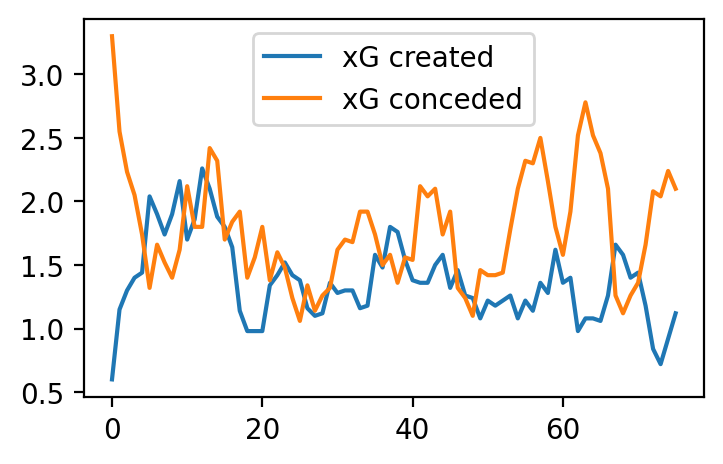

In [30]:
fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label="xG created")
ax.plot(X, Y_ag, label="xG conceded")

ax.legend()

we'll start by styling the ticks and spines of our figure to give it a more minimalistic look

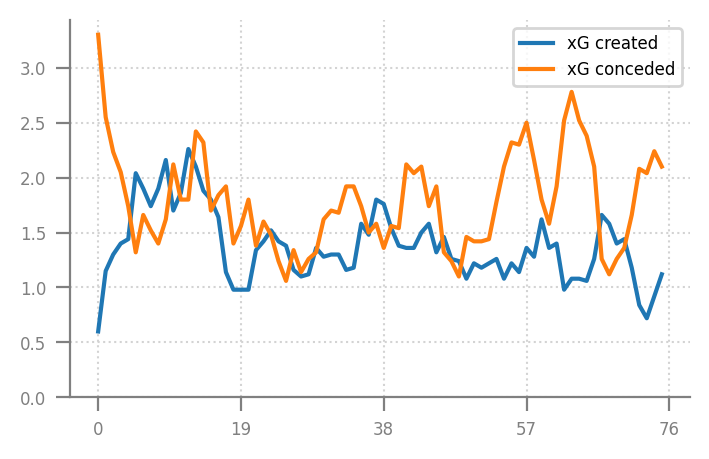

In [31]:
from shutil import which


fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label="xG created")
ax.plot(X, Y_ag, label="xG conceded")

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey"
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.set_ylim(0)

ax.legend(fontsize=6)

fill between the lines

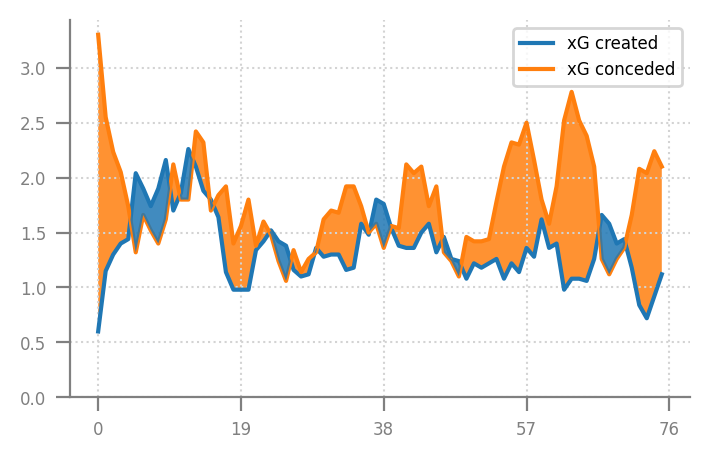

In [32]:
fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label="xG created")
ax.plot(X, Y_ag, label="xG conceded")

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.set_ylim(0)

ax.legend(fontsize=6)

text elements and legends

the first thing you should be aware of is the type of coordinate system you're using to annotate and add text to your visuals. In essence, matplotlib has four different coordinate systems which you can interchange and transform to gain more control in your visual customization journey, these are data, axes, figure and display coordinates

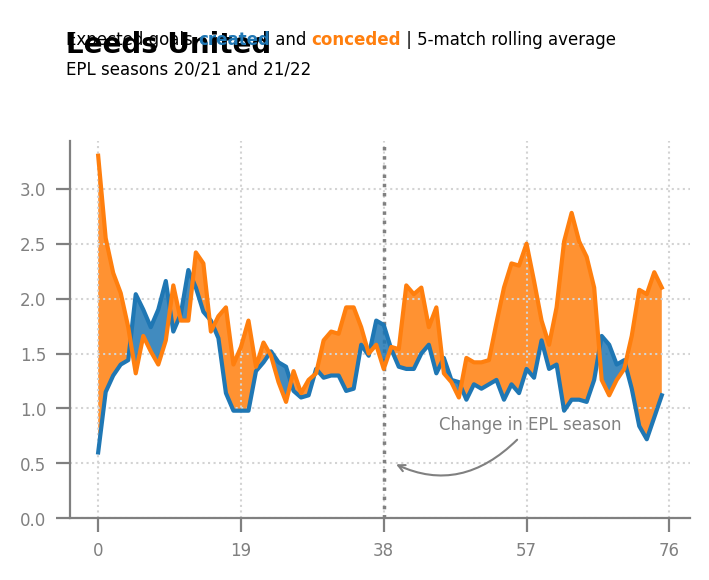

In [33]:
fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, zorder=4)
line_2 = ax.plot(X, Y_ag, zorder=4)

ax.set_ylim(0)
# add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = 'offset points',
    text = 'Change in EPL season',
    size = 6,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # arrow to connect annotation
)

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Leeds United",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.1,
    s = "Expected goals <created> and <conceded> | 5-match rolling average \nEPL seasons 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

final touches

we'll scrape Fotmob's website and plot the image directly into our visual

In [34]:
from PIL import Image
import urllib

the last thing left to do is create a new axes object to draw the image

In [35]:
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.01, .95, 0.11, 0.11], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8463.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

(-0.5, 191.5, 191.5, -0.5)

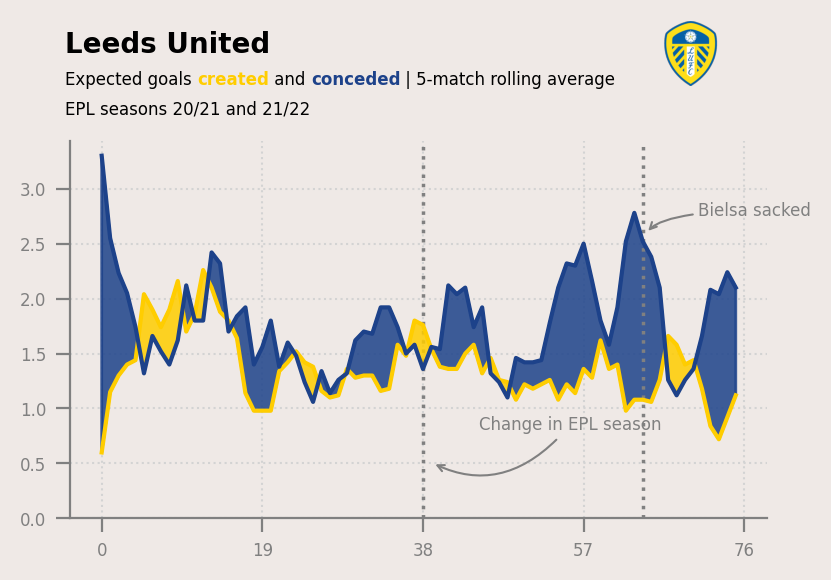

In [42]:
fig = plt.figure(figsize=(4.5, 2.5), dpi=200, facecolor="#EFE9E6")
ax = plt.subplot(111, facecolor="#EFE9E6")

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color="#FFCD00", zorder=4)
line_2 = ax.plot(X, Y_ag, color="#1D428A", zorder=4)

ax.set_ylim(0)
# add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = 'offset points',
    text = 'Change in EPL season',
    size = 6,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # arrow to connect annotation
)

# add a second line to mark the division (Bielsa)
ax.plot(
    [64,64], # gameweek 26 second season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# second annotation with data coordinates and offset points
ax.annotate(
    xy = (64, 2.5),
    xytext = (20, 10),
    textcoords = 'offset points',
    text = 'Bielsa sacked',
    size = 6,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=0,angleB=90"
    ) # arrow to connect annotation
)

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Leeds United",
    color = "black",
    weight = "bold",
    size = 10,
    family = "DM Sans",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 5-match rolling average \nEPL seasons 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8463.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

# add only if zorder don't work
ax.set_axisbelow(True)

save fig

In [37]:
fig.savefig('../figures/LEEDS-xG-rolling-plot.png', bbox_inches='tight')

leeds color palette

1
#FFCD00
#1D428A
#Ac944D